In [587]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


**GET AND PROCESSING DATA**

In [588]:
df = pd.read_csv("../data/featureEngineeredData/Full_data.csv")
df

,PT-92512,KA-9101_ESP,PT-92523,KA-9101_ASP,TT-92512,PDT-92534,FT-92537-01,TT-92539,PT-92539
0,0.568887,0.756645,1.114104,0.469132,1.211533,0.510445,1.593227,-0.591426,1.300561
1,0.883040,1.479688,1.475950,1.217852,1.213979,0.842695,-0.508434,-0.296420,0.300755
2,-1.437611,-0.498885,-0.409312,-0.900826,1.285578,-0.465983,-0.103025,0.027097,-0.316045
3,-1.000302,-0.068849,-0.318639,0.352503,1.299608,-0.007157,-0.988447,-0.078370,-0.071493
4,-1.151931,-0.115811,-0.504366,-0.075952,1.259629,-1.148164,0.838102,-0.108251,-0.313934
...,...,...,...,...,...,...,...,...,...
53205,-0.253059,-0.434749,-0.915413,-0.058739,1.160719,0.446660,0.295219,0.955310,-0.466594
53206,-0.410593,-0.629332,-1.175726,0.773856,1.078445,1.014937,1.634087,0.818230,0.497178
53207,0.929763,-0.566815,-0.127897,0.639480,1.068387,1.938569,0.574032,0.832990,-0.454206
53208,-0.757037,-1.225790,-1.535133,0.772276,1.178779,1.411637,1.613214,0.691635,0.471294


In [558]:
# df = df[5::6]
# df

In [589]:
def df_to_X_y2(df, window_size=6,data_col=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size, 0:6]] #pick on first 6 variables
    X.append(row[0:data_col])
    label = df_as_np[i+window_size][data_col] # the target index
    y.append(label)
  
  print (np.array(X).shape)
  return np.array(X), np.array(y)

In [590]:
X2, y2 = df_to_X_y2(df,6,6)
X2.shape, y2.shape

(53204, 6, 6)


((53204, 6, 6), (53204,))

In [591]:
X2

array([[[ 0.5688867 ,  0.75664519,  1.11410366,  0.46913232,
          1.21153315,  0.51044483],
        [ 0.88304035,  1.47968839,  1.47594952,  1.21785182,
          1.21397928,  0.84269541],
        [-1.4376115 , -0.49888547, -0.40931222, -0.90082614,
          1.28557827, -0.46598257],
        [-1.0003018 , -0.06884909, -0.3186392 ,  0.35250308,
          1.29960804, -0.00715651],
        [-1.15193125, -0.11581108, -0.50436627, -0.07595169,
          1.25962858, -1.14816362],
        [ 0.52604457,  0.05047803,  0.05136503,  0.45472396,
          1.19844724,  0.8763861 ]],

       [[ 0.88304035,  1.47968839,  1.47594952,  1.21785182,
          1.21397928,  0.84269541],
        [-1.4376115 , -0.49888547, -0.40931222, -0.90082614,
          1.28557827, -0.46598257],
        [-1.0003018 , -0.06884909, -0.3186392 ,  0.35250308,
          1.29960804, -0.00715651],
        [-1.15193125, -0.11581108, -0.50436627, -0.07595169,
          1.25962858, -1.14816362],
        [ 0.52604457,  0.050

In [592]:
y2

array([ 0.85575466, -0.86719046,  0.14117779, ...,  0.57403195,
        1.61321401, -0.29083825])

In [593]:
df.iloc[6,:]

PT-92512      -0.432913
KA-9101_ESP   -0.564930
PT-92523      -0.578832
KA-9101_ASP   -0.877507
TT-92512       1.251965
PDT-92534     -0.637726
FT-92537-01    0.855755
TT-92539      -0.341125
PT-92539      -0.307956
Name: 6, dtype: float64

In [594]:
X3, y3 = df_to_X_y2(df,6,7) #our label is at 7
X3.shape, y3.shape

(53204, 6, 6)


((53204, 6, 6), (53204,))

In [595]:
X4, y4 = df_to_X_y2(df,6,8)
X4.shape, y4.shape

(53204, 6, 6)


((53204, 6, 6), (53204,))

In [597]:
X2_train, y2_train = X2[:31920], y2[:31920]
X2_val, y2_val = X2[31920:42500], y2[31920:42500]
X2_test, y2_test = X2[42500:], y2[42500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((31920, 6, 6), (31920,), (10580, 6, 6), (10580,), (10704, 6, 6), (10704,))

In [598]:
X3_train, y3_train = X3[:31920], y3[:31920]
X3_val, y3_val = X3[31920:42500], y3[31920:42500]
X3_test, y3_test = X3[42500:], y3[42500:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((31920, 6, 6), (31920,), (10580, 6, 6), (10580,), (10704, 6, 6), (10704,))

In [599]:
X4_train, y4_train = X4[:31920], y4[:31920]
X4_val, y4_val = X4[31920:42500], y4[31920:42500]
X4_test, y4_test = X4[42500:], y4[42500:]
X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape

((31920, 6, 6), (31920,), (10580, 6, 6), (10580,), (10704, 6, 6), (10704,))

**MODEL EVALUATION**

In [600]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 6)))
model1.add(GRU(128))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_31 (GRU)                 (None, 128)               52224     
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 9         
Total params: 53,265
Trainable params: 53,265
Non-trainable params: 0
_________________________________________________________________


In [601]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [602]:
history = model1.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp1])

Epoch 1/100
998/998 [==============================] - 19s 16ms/step - loss: 0.7058 - root_mean_squared_error: 0.8401 - val_loss: 0.7637 - val_root_mean_squared_error: 0.8739


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 2/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6797 - root_mean_squared_error: 0.8244 - val_loss: 0.7471 - val_root_mean_squared_error: 0.8643


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 3/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6717 - root_mean_squared_error: 0.8196 - val_loss: 0.7382 - val_root_mean_squared_error: 0.8592


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 4/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6664 - root_mean_squared_error: 0.8163 - val_loss: 0.7398 - val_root_mean_squared_error: 0.8601
Epoch 5/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6635 - root_mean_squared_error: 0.8146 - val_loss: 0.7337 - val_root_mean_squared_error: 0.8566


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 6/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6601 - root_mean_squared_error: 0.8125 - val_loss: 0.7272 - val_root_mean_squared_error: 0.8528


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 7/100
998/998 [==============================] - 14s 14ms/step - loss: 0.6580 - root_mean_squared_error: 0.8112 - val_loss: 0.7241 - val_root_mean_squared_error: 0.8510


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 8/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6554 - root_mean_squared_error: 0.8096 - val_loss: 0.7262 - val_root_mean_squared_error: 0.8522
Epoch 9/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6543 - root_mean_squared_error: 0.8089 - val_loss: 0.7234 - val_root_mean_squared_error: 0.8505


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 10/100
998/998 [==============================] - 14s 14ms/step - loss: 0.6529 - root_mean_squared_error: 0.8080 - val_loss: 0.7197 - val_root_mean_squared_error: 0.8483


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 11/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6515 - root_mean_squared_error: 0.8072 - val_loss: 0.7241 - val_root_mean_squared_error: 0.8509
Epoch 12/100
998/998 [==============================] - 15s 16ms/step - loss: 0.6501 - root_mean_squared_error: 0.8063 - val_loss: 0.7208 - val_root_mean_squared_error: 0.8490
Epoch 13/100
998/998 [==============================] - 15s 15ms/step - loss: 0.6491 - root_mean_squared_error: 0.8057 - val_loss: 0.7195 - val_root_mean_squared_error: 0.8482


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 14/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6481 - root_mean_squared_error: 0.8051 - val_loss: 0.7185 - val_root_mean_squared_error: 0.8476


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 15/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6473 - root_mean_squared_error: 0.8045 - val_loss: 0.7181 - val_root_mean_squared_error: 0.8474


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 16/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6462 - root_mean_squared_error: 0.8039 - val_loss: 0.7167 - val_root_mean_squared_error: 0.8466


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 17/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6453 - root_mean_squared_error: 0.8033 - val_loss: 0.7238 - val_root_mean_squared_error: 0.8508
Epoch 18/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6450 - root_mean_squared_error: 0.8031 - val_loss: 0.7161 - val_root_mean_squared_error: 0.8462


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 19/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6442 - root_mean_squared_error: 0.8027 - val_loss: 0.7162 - val_root_mean_squared_error: 0.8463
Epoch 20/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6439 - root_mean_squared_error: 0.8025 - val_loss: 0.7174 - val_root_mean_squared_error: 0.8470
Epoch 21/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6429 - root_mean_squared_error: 0.8018 - val_loss: 0.7192 - val_root_mean_squared_error: 0.8480
Epoch 22/100
998/998 [==============================] - 11s 11ms/step - loss: 0.6429 - root_mean_squared_error: 0.8018 - val_loss: 0.7175 - val_root_mean_squared_error: 0.8471
Epoch 23/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6419 - root_mean_squared_error: 0.8012 - val_loss: 0.7141 - val_root_mean_squared_error: 0.8450


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 24/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6417 - root_mean_squared_error: 0.8011 - val_loss: 0.7143 - val_root_mean_squared_error: 0.8452
Epoch 25/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6411 - root_mean_squared_error: 0.8007 - val_loss: 0.7119 - val_root_mean_squared_error: 0.8437


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 26/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6408 - root_mean_squared_error: 0.8005 - val_loss: 0.7121 - val_root_mean_squared_error: 0.8438
Epoch 27/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6404 - root_mean_squared_error: 0.8002 - val_loss: 0.7121 - val_root_mean_squared_error: 0.8438
Epoch 28/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6397 - root_mean_squared_error: 0.7998 - val_loss: 0.7137 - val_root_mean_squared_error: 0.8448
Epoch 29/100
998/998 [==============================] - 14s 14ms/step - loss: 0.6397 - root_mean_squared_error: 0.7998 - val_loss: 0.7148 - val_root_mean_squared_error: 0.8455
Epoch 30/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6390 - root_mean_squared_error: 0.7994 - val_loss: 0.7142 - val_root_mean_squared_error: 0.8451
Epoch 31/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6388 - root_mean_squared_error: 0.7992 -

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 34/100
998/998 [==============================] - 14s 15ms/step - loss: 0.6376 - root_mean_squared_error: 0.7985 - val_loss: 0.7129 - val_root_mean_squared_error: 0.8443
Epoch 35/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6373 - root_mean_squared_error: 0.7983 - val_loss: 0.7153 - val_root_mean_squared_error: 0.8458
Epoch 36/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6364 - root_mean_squared_error: 0.7978 - val_loss: 0.7157 - val_root_mean_squared_error: 0.8460
Epoch 37/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6363 - root_mean_squared_error: 0.7977 - val_loss: 0.7137 - val_root_mean_squared_error: 0.8448
Epoch 38/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6359 - root_mean_squared_error: 0.7974 - val_loss: 0.7107 - val_root_mean_squared_error: 0.8430


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 39/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6358 - root_mean_squared_error: 0.7974 - val_loss: 0.7101 - val_root_mean_squared_error: 0.8426


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 40/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6349 - root_mean_squared_error: 0.7968 - val_loss: 0.7093 - val_root_mean_squared_error: 0.8422


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 41/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6351 - root_mean_squared_error: 0.7969 - val_loss: 0.7129 - val_root_mean_squared_error: 0.8443
Epoch 42/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6343 - root_mean_squared_error: 0.7964 - val_loss: 0.7127 - val_root_mean_squared_error: 0.8442
Epoch 43/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6344 - root_mean_squared_error: 0.7965 - val_loss: 0.7130 - val_root_mean_squared_error: 0.8444
Epoch 44/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6340 - root_mean_squared_error: 0.7962 - val_loss: 0.7134 - val_root_mean_squared_error: 0.8446
Epoch 45/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6335 - root_mean_squared_error: 0.7959 - val_loss: 0.7087 - val_root_mean_squared_error: 0.8419


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 46/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6333 - root_mean_squared_error: 0.7958 - val_loss: 0.7115 - val_root_mean_squared_error: 0.8435
Epoch 47/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6333 - root_mean_squared_error: 0.7958 - val_loss: 0.7112 - val_root_mean_squared_error: 0.8433
Epoch 48/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6329 - root_mean_squared_error: 0.7955 - val_loss: 0.7124 - val_root_mean_squared_error: 0.8440
Epoch 49/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6324 - root_mean_squared_error: 0.7952 - val_loss: 0.7267 - val_root_mean_squared_error: 0.8525
Epoch 50/100
998/998 [==============================] - 12s 12ms/step - loss: 0.6321 - root_mean_squared_error: 0.7951 - val_loss: 0.7130 - val_root_mean_squared_error: 0.8444
Epoch 51/100
998/998 [==============================] - 13s 13ms/step - loss: 0.6321 - root_mean_squared_error: 0.7950 -

In [605]:
#TT
model2 = Sequential()
model2.add(InputLayer((6, 6)))
model2.add(GRU(128))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 128)               52224     
_________________________________________________________________
dense_98 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 9         
Total params: 53,265
Trainable params: 53,265
Non-trainable params: 0
_________________________________________________________________


In [606]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [607]:
history1 = model2.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=100, callbacks=[cp2])

Epoch 1/100
998/998 [==============================] - 13s 11ms/step - loss: 0.4275 - root_mean_squared_error: 0.6538 - val_loss: 0.8104 - val_root_mean_squared_error: 0.9002


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 2/100
998/998 [==============================] - 12s 12ms/step - loss: 0.2751 - root_mean_squared_error: 0.5245 - val_loss: 0.6269 - val_root_mean_squared_error: 0.7918


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 3/100
998/998 [==============================] - 10s 10ms/step - loss: 0.2459 - root_mean_squared_error: 0.4959 - val_loss: 0.5697 - val_root_mean_squared_error: 0.7548


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 4/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2339 - root_mean_squared_error: 0.4836 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7117


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 5/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2277 - root_mean_squared_error: 0.4772 - val_loss: 0.5420 - val_root_mean_squared_error: 0.7362
Epoch 6/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2226 - root_mean_squared_error: 0.4718 - val_loss: 0.5430 - val_root_mean_squared_error: 0.7369
Epoch 7/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2178 - root_mean_squared_error: 0.4667 - val_loss: 0.5568 - val_root_mean_squared_error: 0.7462
Epoch 8/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2131 - root_mean_squared_error: 0.4617 - val_loss: 0.5827 - val_root_mean_squared_error: 0.7634
Epoch 9/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2102 - root_mean_squared_error: 0.4584 - val_loss: 0.5461 - val_root_mean_squared_error: 0.7390
Epoch 10/100
998/998 [==============================] - 11s 11ms/step - loss: 0.2067 - root_mean_squared_error: 0.4546 - val_

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 34/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1790 - root_mean_squared_error: 0.4231 - val_loss: 0.5670 - val_root_mean_squared_error: 0.7530
Epoch 35/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1785 - root_mean_squared_error: 0.4225 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 36/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1780 - root_mean_squared_error: 0.4219 - val_loss: 0.4988 - val_root_mean_squared_error: 0.7062
Epoch 37/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1772 - root_mean_squared_error: 0.4210 - val_loss: 0.5509 - val_root_mean_squared_error: 0.7422
Epoch 38/100
998/998 [==============================] - 14s 14ms/step - loss: 0.1766 - root_mean_squared_error: 0.4202 - val_loss: 0.5652 - val_root_mean_squared_error: 0.7518
Epoch 39/100
998/998 [==============================] - 15s 15ms/step - loss: 0.1758 - root_mean_squared_error: 0.4193 -

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 45/100
998/998 [==============================] - 14s 14ms/step - loss: 0.1726 - root_mean_squared_error: 0.4155 - val_loss: 0.5135 - val_root_mean_squared_error: 0.7166
Epoch 46/100
998/998 [==============================] - 15s 15ms/step - loss: 0.1720 - root_mean_squared_error: 0.4147 - val_loss: 0.5422 - val_root_mean_squared_error: 0.7363
Epoch 47/100
998/998 [==============================] - 20s 20ms/step - loss: 0.1717 - root_mean_squared_error: 0.4144 - val_loss: 0.5648 - val_root_mean_squared_error: 0.7515
Epoch 48/100
998/998 [==============================] - 20s 20ms/step - loss: 0.1709 - root_mean_squared_error: 0.4134 - val_loss: 0.5143 - val_root_mean_squared_error: 0.7172
Epoch 49/100
998/998 [==============================] - 17s 17ms/step - loss: 0.1706 - root_mean_squared_error: 0.4131 - val_loss: 0.5572 - val_root_mean_squared_error: 0.7464
Epoch 50/100
998/998 [==============================] - 20s 20ms/step - loss: 0.1703 - root_mean_squared_error: 0.4127 -

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


Epoch 60/100
998/998 [==============================] - 13s 13ms/step - loss: 0.1666 - root_mean_squared_error: 0.4082 - val_loss: 0.5407 - val_root_mean_squared_error: 0.7353
Epoch 61/100
998/998 [==============================] - 13s 13ms/step - loss: 0.1655 - root_mean_squared_error: 0.4068 - val_loss: 0.5291 - val_root_mean_squared_error: 0.7274
Epoch 62/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1653 - root_mean_squared_error: 0.4066 - val_loss: 0.5204 - val_root_mean_squared_error: 0.7214
Epoch 63/100
998/998 [==============================] - 13s 13ms/step - loss: 0.1651 - root_mean_squared_error: 0.4064 - val_loss: 0.5106 - val_root_mean_squared_error: 0.7146
Epoch 64/100
998/998 [==============================] - 12s 12ms/step - loss: 0.1649 - root_mean_squared_error: 0.4061 - val_loss: 0.5486 - val_root_mean_squared_error: 0.7407
Epoch 65/100
998/998 [==============================] - 11s 11ms/step - loss: 0.1646 - root_mean_squared_error: 0.4057 -

In [609]:
#PT
model3 = Sequential()
model3.add(InputLayer((6, 6)))
model3.add(GRU(128))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 128)               52224     
_________________________________________________________________
dense_98 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 9         
Total params: 53,265
Trainable params: 53,265
Non-trainable params: 0
_________________________________________________________________


In [610]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [611]:
history2 = model3.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=100, callbacks=[cp3])

Epoch 1/100
998/998 [==============================] - 13s 11ms/step - loss: 0.5623 - root_mean_squared_error: 0.7499 - val_loss: 0.5299 - val_root_mean_squared_error: 0.7279


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 2/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4949 - root_mean_squared_error: 0.7035 - val_loss: 0.5211 - val_root_mean_squared_error: 0.7219


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 3/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4873 - root_mean_squared_error: 0.6981 - val_loss: 0.5136 - val_root_mean_squared_error: 0.7166


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 4/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4820 - root_mean_squared_error: 0.6943 - val_loss: 0.5109 - val_root_mean_squared_error: 0.7148


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 5/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4780 - root_mean_squared_error: 0.6914 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 6/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4751 - root_mean_squared_error: 0.6893 - val_loss: 0.5083 - val_root_mean_squared_error: 0.7129
Epoch 7/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4725 - root_mean_squared_error: 0.6874 - val_loss: 0.5126 - val_root_mean_squared_error: 0.7159
Epoch 8/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4702 - root_mean_squared_error: 0.6857 - val_loss: 0.4990 - val_root_mean_squared_error: 0.7064


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 9/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4684 - root_mean_squared_error: 0.6844 - val_loss: 0.4965 - val_root_mean_squared_error: 0.7046


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 10/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4665 - root_mean_squared_error: 0.6830 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7065
Epoch 11/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4649 - root_mean_squared_error: 0.6818 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7106
Epoch 12/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4635 - root_mean_squared_error: 0.6808 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 13/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4620 - root_mean_squared_error: 0.6797 - val_loss: 0.4957 - val_root_mean_squared_error: 0.7041


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 14/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4605 - root_mean_squared_error: 0.6786 - val_loss: 0.4948 - val_root_mean_squared_error: 0.7034


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 15/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4596 - root_mean_squared_error: 0.6779 - val_loss: 0.5014 - val_root_mean_squared_error: 0.7081
Epoch 16/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4584 - root_mean_squared_error: 0.6770 - val_loss: 0.4931 - val_root_mean_squared_error: 0.7022


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 17/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4576 - root_mean_squared_error: 0.6764 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 18/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4569 - root_mean_squared_error: 0.6759 - val_loss: 0.4910 - val_root_mean_squared_error: 0.7007


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 19/100
998/998 [==============================] - 13s 13ms/step - loss: 0.4557 - root_mean_squared_error: 0.6751 - val_loss: 0.4922 - val_root_mean_squared_error: 0.7016
Epoch 20/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4547 - root_mean_squared_error: 0.6743 - val_loss: 0.4853 - val_root_mean_squared_error: 0.6966


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 21/100
998/998 [==============================] - 13s 13ms/step - loss: 0.4541 - root_mean_squared_error: 0.6739 - val_loss: 0.4948 - val_root_mean_squared_error: 0.7034
Epoch 22/100
998/998 [==============================] - 15s 15ms/step - loss: 0.4536 - root_mean_squared_error: 0.6735 - val_loss: 0.4924 - val_root_mean_squared_error: 0.7017
Epoch 23/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4527 - root_mean_squared_error: 0.6729 - val_loss: 0.4903 - val_root_mean_squared_error: 0.7002
Epoch 24/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4514 - root_mean_squared_error: 0.6718 - val_loss: 0.5024 - val_root_mean_squared_error: 0.7088
Epoch 25/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4507 - root_mean_squared_error: 0.6714 - val_loss: 0.4913 - val_root_mean_squared_error: 0.7010
Epoch 26/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4500 - root_mean_squared_error: 0.6708 -

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 28/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4490 - root_mean_squared_error: 0.6701 - val_loss: 0.4911 - val_root_mean_squared_error: 0.7008
Epoch 29/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4484 - root_mean_squared_error: 0.6696 - val_loss: 0.4885 - val_root_mean_squared_error: 0.6989
Epoch 30/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4478 - root_mean_squared_error: 0.6692 - val_loss: 0.4882 - val_root_mean_squared_error: 0.6987
Epoch 31/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4470 - root_mean_squared_error: 0.6686 - val_loss: 0.4882 - val_root_mean_squared_error: 0.6987
Epoch 32/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4468 - root_mean_squared_error: 0.6684 - val_loss: 0.4869 - val_root_mean_squared_error: 0.6978
Epoch 33/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4459 - root_mean_squared_error: 0.6677 -

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 50/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss: 0.4809 - val_root_mean_squared_error: 0.6935


INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 51/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4374 - root_mean_squared_error: 0.6613 - val_loss: 0.4853 - val_root_mean_squared_error: 0.6967
Epoch 52/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4367 - root_mean_squared_error: 0.6609 - val_loss: 0.4892 - val_root_mean_squared_error: 0.6995
Epoch 53/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4362 - root_mean_squared_error: 0.6605 - val_loss: 0.4850 - val_root_mean_squared_error: 0.6964
Epoch 54/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4363 - root_mean_squared_error: 0.6605 - val_loss: 0.4933 - val_root_mean_squared_error: 0.7023
Epoch 55/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4359 - root_mean_squared_error: 0.6602 - val_loss: 0.4851 - val_root_mean_squared_error: 0.6965
Epoch 56/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4354 - root_mean_squared_error: 0.6598 -

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


Epoch 70/100
998/998 [==============================] - 13s 13ms/step - loss: 0.4298 - root_mean_squared_error: 0.6556 - val_loss: 0.4892 - val_root_mean_squared_error: 0.6994
Epoch 71/100
998/998 [==============================] - 11s 11ms/step - loss: 0.4289 - root_mean_squared_error: 0.6549 - val_loss: 0.4947 - val_root_mean_squared_error: 0.7033
Epoch 72/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4286 - root_mean_squared_error: 0.6547 - val_loss: 0.4834 - val_root_mean_squared_error: 0.6953
Epoch 73/100
998/998 [==============================] - 12s 13ms/step - loss: 0.4284 - root_mean_squared_error: 0.6545 - val_loss: 0.4847 - val_root_mean_squared_error: 0.6962
Epoch 74/100
998/998 [==============================] - 13s 13ms/step - loss: 0.4272 - root_mean_squared_error: 0.6536 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980
Epoch 75/100
998/998 [==============================] - 12s 12ms/step - loss: 0.4268 - root_mean_squared_error: 0.6533 -

In [603]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model, X, y, start=0, end=10000):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  df = pd.DataFrame(data={'Actuals':y, 'Predictions':predictions})
  plt.plot(df['Actuals'][start:end])
  plt.plot(df['Predictions'][start:end])


  
  return df, mse(y, predictions)


---------------------------------
The model MAE is: 0.6410680632921605
The model R2 is: 0.3690982280139694
---------------------------------


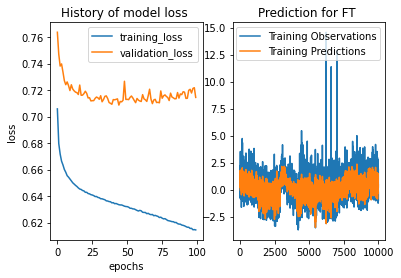

In [614]:
from sklearn.metrics import mean_absolute_error, r2_score
#Plot on FT
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training_loss')
plt.plot(history.history['val_loss'],label = 'validation_loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title(f"History of model loss ")


plt.subplot(1,2,2)
plot_predictions1(model1, X2_test, y2_test)
plt.legend(['Training Observations','Training Predictions'])
plt.title(f"Prediction for FT ")

y_pred = model1.predict(X2_test)
maeScore = mean_absolute_error(y_true=y2_test, y_pred=y_pred)
r2Score= r2_score(y_true = y2_test, y_pred = y_pred)

print("---------------------------------")
print(f"The model MAE is: {maeScore}")
print(f"The model R2 is: {r2Score}")
print("---------------------------------")

---------------------------------
The model MAE is: 0.4571120738234046
The model R2 is: 0.8041132906018397
---------------------------------


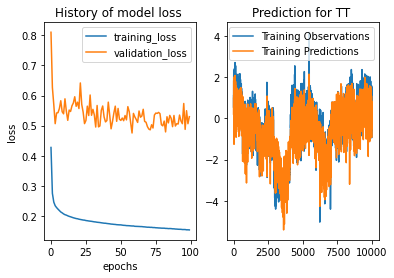

In [616]:
#Plot on TT
plt.subplot(1,2,1)
plt.plot(history1.history['loss'],label = 'training_loss')
plt.plot(history1.history['val_loss'],label = 'validation_loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title(f"History of model loss ")


plt.subplot(1,2,2)
plot_predictions1(model2, X3_test, y3_test)
plt.legend(['Training Observations','Training Predictions'])
plt.title(f"Prediction for TT ")

y_pred = model2.predict(X3_test)
maeScore = mean_absolute_error(y_true=y3_test, y_pred=y_pred)
r2Score= r2_score(y_true = y3_test, y_pred = y_pred)

print("---------------------------------")
print(f"The model MAE is: {maeScore}")
print(f"The model R2 is: {r2Score}")
print("---------------------------------")

---------------------------------
The model MAE is: 0.5748704425667484
The model R2 is: 0.47239235020078363
---------------------------------


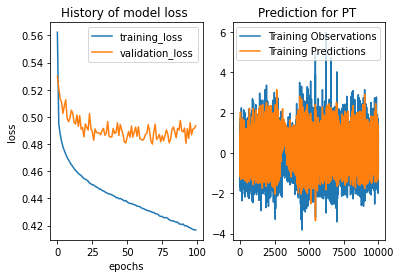

In [618]:
#Plot on PT
plt.subplot(1,2,1)
plt.plot(history2.history['loss'],label = 'training_loss')
plt.plot(history2.history['val_loss'],label = 'validation_loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title(f"History of model loss ")


plt.subplot(1,2,2)
plot_predictions1(model3, X4_test, y4_test)
plt.legend(['Training Observations','Training Predictions'])
plt.title(f"Prediction for PT ")

y_pred = model3.predict(X4_test)
maeScore = mean_absolute_error(y_true=y4_test, y_pred=y_pred)
r2Score= r2_score(y_true = y4_test, y_pred = y_pred)

print("---------------------------------")
print(f"The model MAE is: {maeScore}")
print(f"The model R2 is: {r2Score}")
print("---------------------------------")

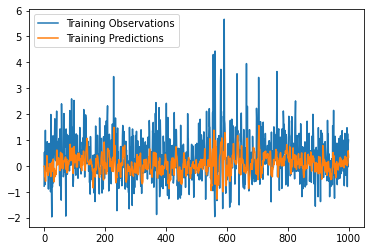

In [582]:
plot_predictions1(model1, X2_test, y2_test)
plt.legend(['Training Observations','Training Predictions'])

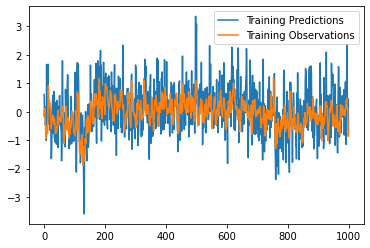

In [583]:
plot_predictions1(model1, X2_val, y2_val)
plt.legend(['Training Predictions', 'Training Observations'])

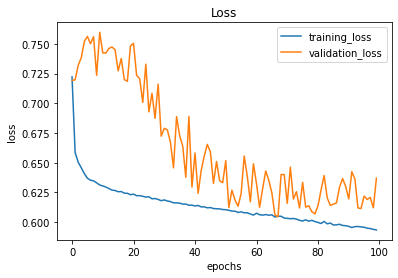

In [584]:
plt.plot(history.history['loss'],label = 'training_loss')
plt.plot(history.history['val_loss'],label = 'validation_loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()